In [1]:
import numpy as np
import pandas as pd
import pydicom as dicom
import os
import matplotlib.pyplot as plt

In [5]:
INPUT_FOLDER = 'C://Users//mario//DataspellProjects//dicom_files_python//DICOM_files'
dicom_files = os.listdir(INPUT_FOLDER)
try:
    slices = [dicom.read_file(os.path.join(INPUT_FOLDER, s)) for s in dicom_files]
except Exception as e:
    print(f"Error reading DICOM file: {str(e)}")

In [4]:
def extract_dicom_info(sls, include, exclude):
    
    # First let's handle the tags 
    tags = []
    for tag in include:
        tags += list(sls[0].group_dataset(tag).keys())
    
    if len(exclude)!=0:
        tags = [tag for tag in tags if tag not in exclude]
            
    # We initialize the data list with a list comprehension, 
    # ensuring that each dictionary in the list contains the same 
    # keys (columns) with initial values set to NaN. 
    # It creates a lit of dictionaries, each element of the list is composed of: 
    # [{Image: Image0, (0x00100010): NaN, (...)}, {Image: Image1, (0x00100010): NaN, (...)}]
    data = [{'Image': f'Image{i}', **{tag: np.nan for tag in tags}} for i in range(len(slices))]
    
    for i, ds in enumerate(slices):
        # Inside the loop, we update the values in each dictionary 
        # based on the available DICOM data, leaving the value as NaN if an error occurs.
        for key in tags:
            try:
                value = ds[key].value
                # Update the dictionary with valid values where available
                data[i][key] = value
            except Exception as e:
                pass  # Leave the value as NaN if an error occurs
    
    # Create a DataFrame from the list of dictionaries
    dicom_df = pd.DataFrame(data)
    names = [sls[0][k].name for k in tags]
    dicom_df.columns = (['Image'] + names)
    return dicom_df


include_tags = [0x0010, 0x0028]
exclude_keys = [0x00100010, 0x00100030, 0x00281050, 0x00281051, 0x00281052, 0x00281053]
dcm_info_df = extract_dicom_info(slices, include_tags, exclude_keys)
dcm_info_df

,Image,Patient ID,Patient's Sex,Patient's Age,Samples per Pixel,Photometric Interpretation,Rows,Columns,Pixel Spacing,Bits Allocated,Bits Stored,High Bit,Pixel Representation,Smallest Image Pixel Value,Largest Image Pixel Value
0,Image0,65259,F,094Y,1,MONOCHROME2,512,512,"[0.4609375, 0.4609375]",16,16,15,0,0.0,3467.0
1,Image1,570,F,055Y,1,MONOCHROME2,512,512,"[0.748046875, 0.748046875]",16,16,15,0,0.0,2116.0
2,Image2,570,F,055Y,1,MONOCHROME2,512,512,"[0.748046875, 0.748046875]",16,16,15,0,0.0,2192.0
3,Image3,NOID,M,038Y,1,MONOCHROME2,512,512,"[0.427734375, 0.427734375]",16,12,11,0,NaN,NaN
4,Image4,164789,F,070Y,1,MONOCHROME2,2294,1916,"[0.0940909087658, 0.0940909087658]",16,16,15,0,0.0,2773.0
5,Image5,CAIS,F,NaN,1,MONOCHROME2,256,256,"[0.8984375, 0.8984375]",16,12,11,0,NaN,NaN
6,Image6,1.1465731,M,062Y,1,MONOCHROME2,512,512,"[0.73046875, 0.73046875]",16,16,15,1,NaN,NaN
7,Image7,570,F,055Y,1,MONOCHROME2,512,512,"[0.748046875, 0.748046875]",16,16,15,0,0.0,4000.0
8,Image8,NOID,M,038Y,1,MONOCHROME2,512,512,"[0.427734375, 0.427734375]",16,12,11,0,NaN,NaN
9,Image9,AN0062426369,M,NaN,1,MONOCHROME2,384,384,"[0.9765625, 0.9765625]",16,12,11,0,NaN,NaN


1. **Samples per Pixel**: This feature indicates the number of color channels or samples used to represent each pixel. For grayscale images, it is typically 1, while for color images, it is often 3 (RGB) or 4 (RGBA).

2. **Photometric Interpretation**: It defines the color space and pixel encoding used in the image. Common interpretations include "MONOCHROME2" for grayscale and "RGB" for color images.

3. **Rows**: This specifies the number of rows (height) in the image matrix, indicating the image's vertical size.

4. **Columns**: It represents the number of columns (width) in the image matrix, indicating the image's horizontal size.

5. **Pixel Spacing**: Pixel spacing defines the physical size of each pixel in the image. It typically includes both the row and column pixel spacing values, often measured in millimeters.

6. **Bits Allocated**: This feature indicates the number of bits used to represent each pixel value in the image. It defines the range of pixel values that can be stored.

7. **Bits Stored**: It specifies the actual number of bits used to store the pixel values. It can be less than or equal to the bits allocated, indicating the precision of pixel data.

8. **High Bit**: High bit identifies the most significant bit in the pixel data. It helps interpret the pixel values and is often used for image scaling and windowing.

9. **Pixel Representation**: This feature indicates whether the pixel values are signed or unsigned. A value of 0 typically represents unsigned data, while 1 represents signed data.

10. **Smallest Image Pixel Value**: It denotes the minimum pixel value in the image. Useful for setting the lower limit of the display window.

11. **Largest Image Pixel Value**: This represents the maximum pixel value in the image, helping set the upper limit of the display window.

In [11]:
def display_dicom_slice(dicom_slice):
    # Extract pixel data from the DICOM image
    pixel_data = dicom_slice.pixel_array

    # Display the DICOM slice without grid and axis labels
    plt.imshow(pixel_data, cmap='gray')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

<Figure size 10000x10000 with 0 Axes>

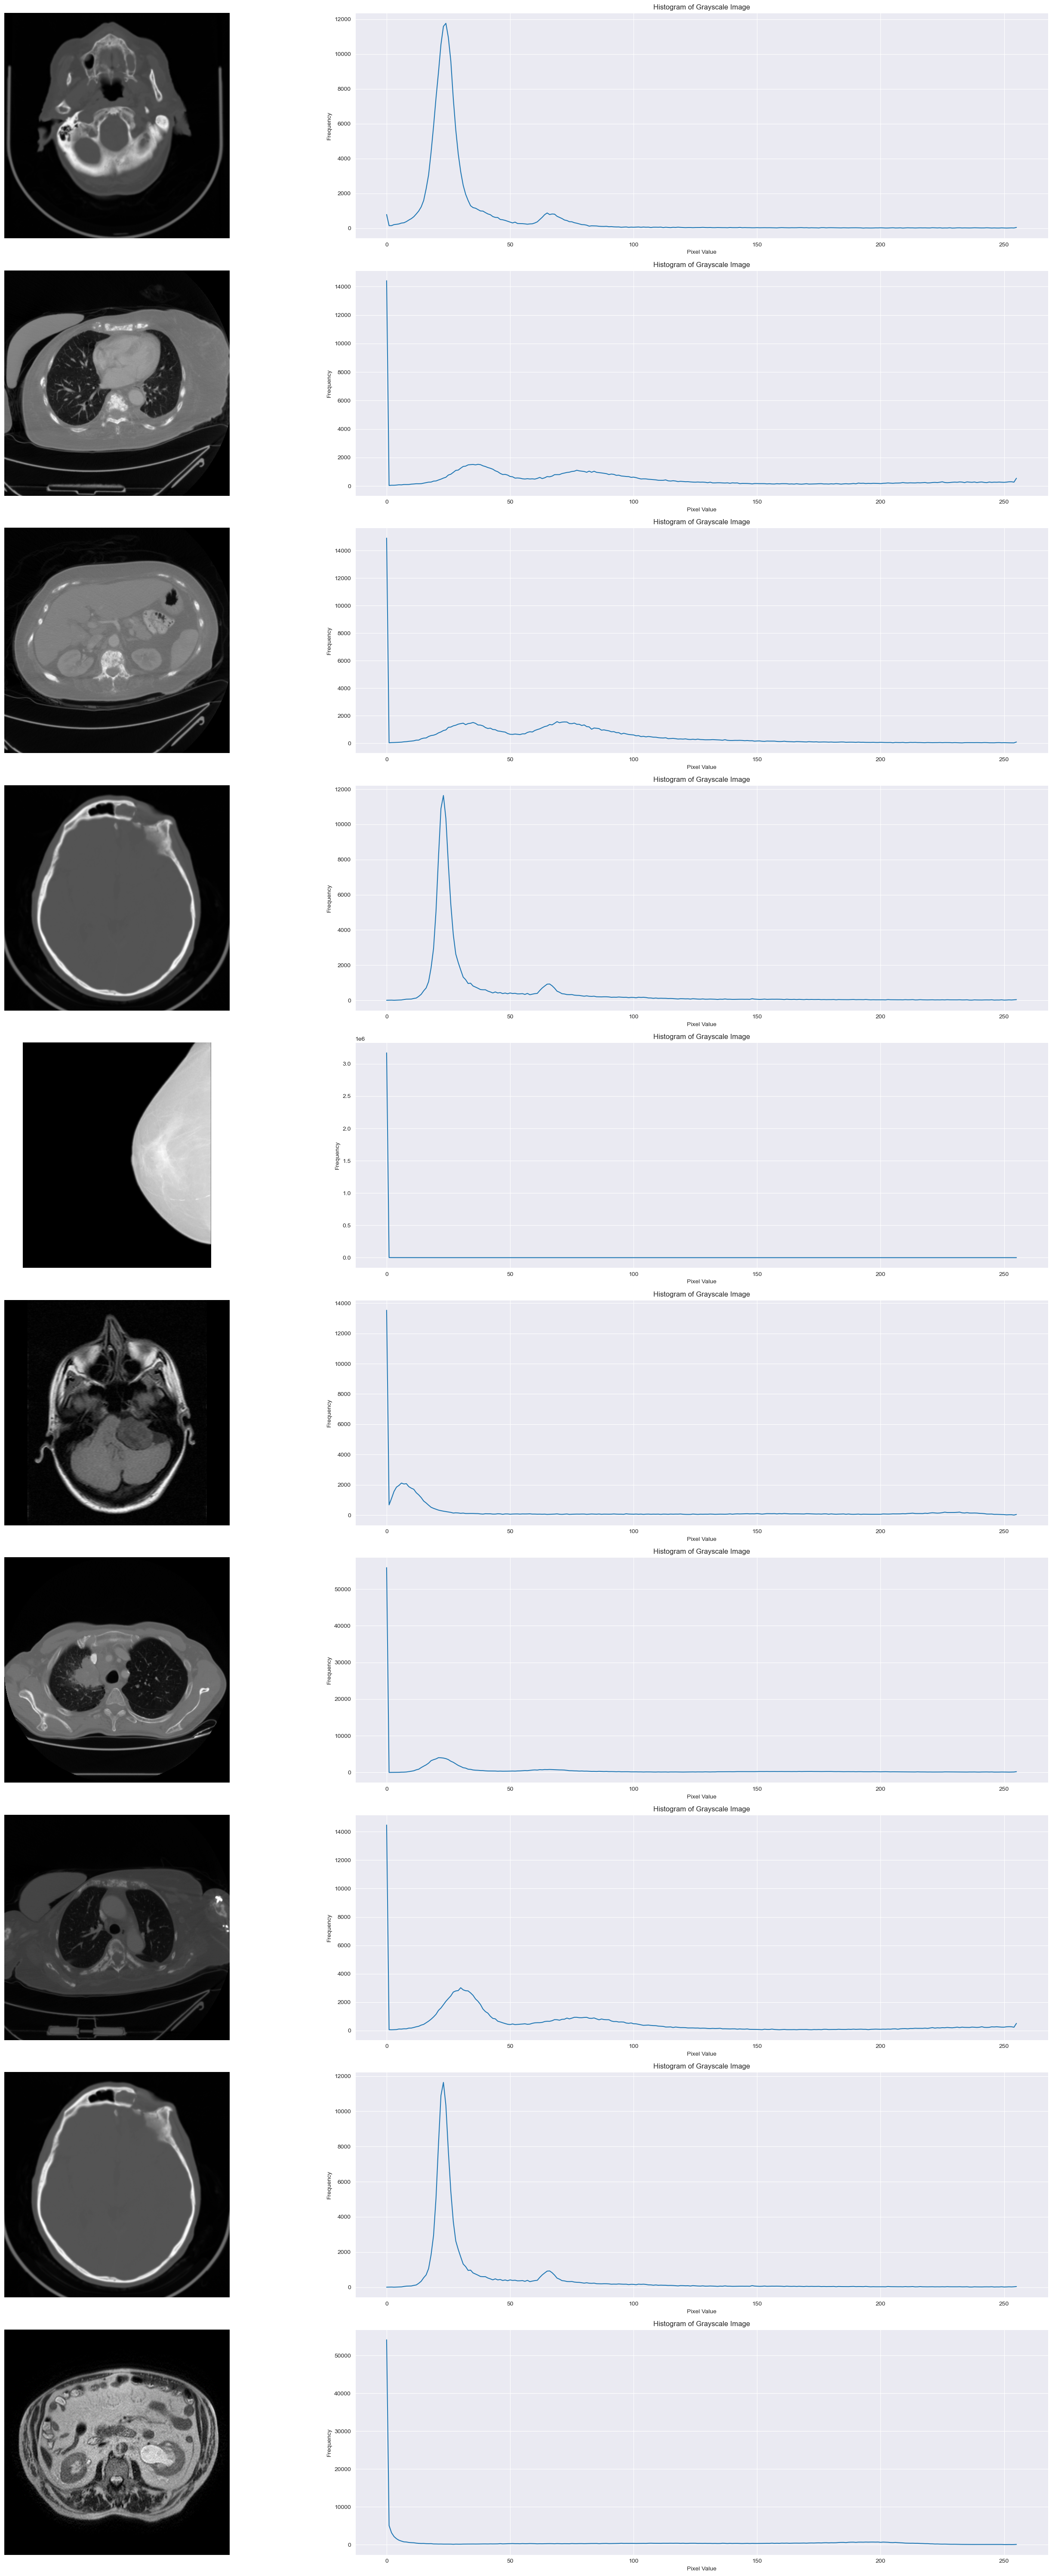

In [10]:
def display_images_with_histograms(dicom_slices):
    num_images = len(dicom_slices)
    num_rows = num_images
    num_cols = 2
    plt.figure(figsize=(100,100))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,60))

    for i, dicom_slice in enumerate(dicom_slices):
        # Extract pixel data from the DICOM image
        pixel_data = dicom_slice.pixel_array
    
        # Display the DICOM image in the top row of subplots
        axes[i, 0].imshow(pixel_data, cmap='gray')
        axes[i, 0].axis('off')
        # axes[i, 0].set_aspect('auto')
        
        # Plot the histogram in the bottom row of subplots
        counts, binLocations = np.histogram(pixel_data, bins=256, range=(0, 256))
        axes[i, 1].plot(binLocations[:-1], counts)
        axes[i, 1].set_title('Histogram of Grayscale Image')
        axes[i, 1].set_xlabel('Pixel Value')
        axes[i, 1].set_ylabel('Frequency')

        # Plot the histogram in the bottom row of subplots
        # axes[i, 1].hist(pixel_data.ravel(), bins=256, range=(0, 256), density=True)
        # axes[i, 1].set_title('Histogram')
        # axes[i, 1].set_xlabel('Pixel Value')
        # axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# display_images_with_histograms(slices)

Python equivalent for Matlab functions

In [14]:
def imhist(I, show_plots=True):
    counts, binLocations = np.histogram(I, bins=256, range=(0, 256))
    if show_plots:
        plt.plot(binLocations[:-1], counts)
        plt.title('Histogram of Grayscale Image')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.show()
    return counts, binLocations

def imhist_bins(I, n, show_plots=True):
    counts, binLocations = np.histogram(I, bins=n, range=(0, 256))
    if show_plots:
        plt.plot(binLocations[:-1], counts)
        plt.title(f'Histogram of Grayscale Image (with {n} bins)')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.show()
    return counts, binLocations

**counts**:
    counts is an array that stores the frequency or count of pixel values in the image for each bin. Each bin represents a range of pixel values.
    In the context of image histograms, counts typically represents how many pixels in the image have pixel values falling within each bin's range.
    For example, if you have 256 bins (common for grayscale images), counts[0] might represent how many pixels in the image have pixel values of 0, counts[1] for pixel values of 1, and so on.

**binLocations**:
    binLocations is an array that stores the locations or values at which the bins are defined.
    In the context of image histograms, binLocations represents the pixel values corresponding to the start of each bin's range.
    For example, if you have 256 bins for a grayscale image, binLocations[0] might be 0 (the lower limit of the first bin), binLocations[1] might be 1 (the lower limit of the second bin), and so forth.

In [15]:
def imhist_cmap(X, cmap, show_plots=True):
    counts = np.zeros(len(cmap), dtype=int)

    for pixel_value in X.ravel():
        counts[pixel_value] += 1

    binLocations = np.arange(len(cmap))
    
    if show_plots:
        plt.bar(binLocations, counts)
        plt.title('Histogram of Indexed Image')
        plt.xlabel('Color Index')
        plt.ylabel('Frequency')
        plt.show()
    return counts, binLocations

**X**:
    X is the input indexed image for which you want to calculate the histogram.
    It should be a 2D NumPy array (matrix) representing the indexed image.
    Each element in the array represents a pixel's color index, which corresponds to a color in the colormap (cmap).

**cmap**:
    cmap is the colormap associated with the indexed image X.
    It should be a list, array, or any data structure that stores the colors in the colormap.
    Each element in cmap corresponds to a color that can be assigned to a pixel in X.
    The length of cmap should typically match the maximum color index present in X plus one. For example, if the maximum color index in X is 255, then cmap should have 256 colors.

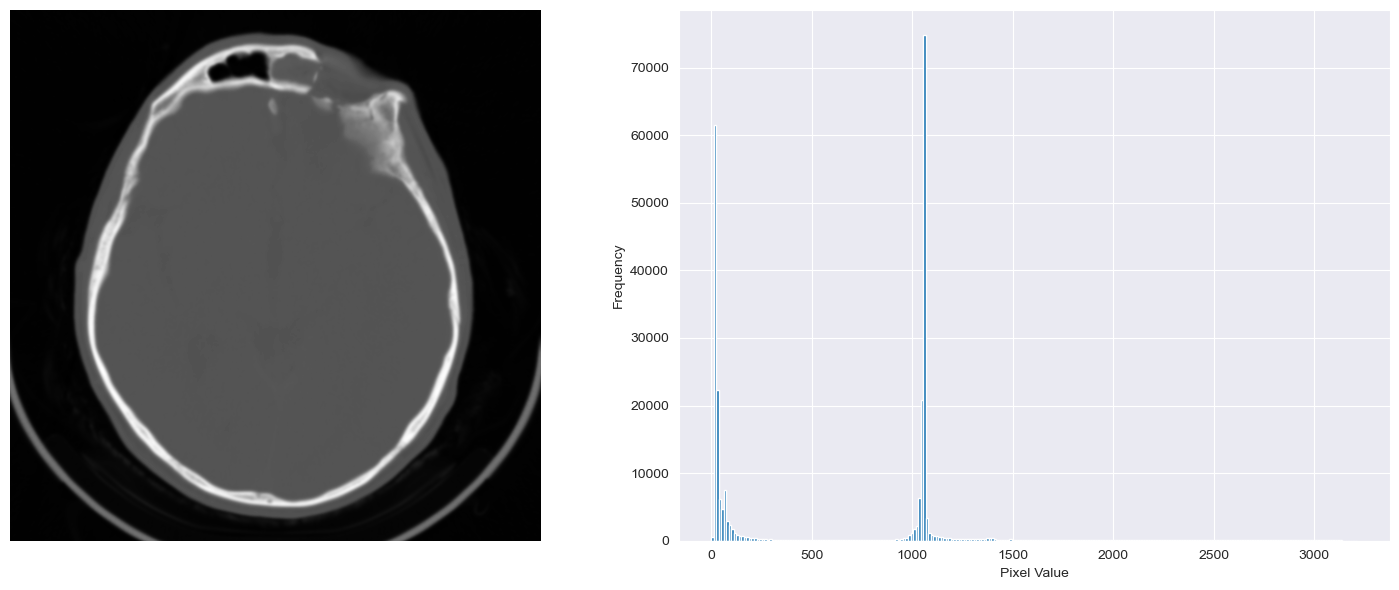

In [105]:
def create_histogram(pixel_array, bins=256):
    # Initialize a list to store pixel counts for each bin
    histogram = [0] * bins

    # Find the minimum and maximum pixel values
    min_pixel = float('inf')
    max_pixel = float('-inf')

    for row in pixel_array:
        for pixel in row:
            if pixel < min_pixel:
                min_pixel = pixel
            if pixel > max_pixel:
                max_pixel = pixel

    # Calculate the range and width of each bin
    pixel_range = max_pixel - min_pixel
    bin_width = pixel_range / bins

    # Populate the histogram
    for row in pixel_array:
        for pixel in row:
            # Calculate bin_index and ensure it's within valid range
            bin_index = int((pixel - min_pixel) / bin_width)
            bin_index = max(0, min(bin_index, bins - 1))  # Ensure it's within [0, bins-1]
            histogram[bin_index] += 1


    # Create the x-axis values for the histogram
    bin_edges = [min_pixel + i * (max_pixel - min_pixel) / len(histogram) for i in range(len(histogram) + 1)]


    fig, axes = plt.subplots(1, 2, figsize=(15,6))



    axes[0].imshow(pixel_array, cmap='gray')
    axes[0].axis('off')
    # Plot the histogram
    axes[1].bar(bin_edges[:-1], histogram, width=(max_pixel - min_pixel) / len(histogram), align='edge')
    axes[1].set_xlabel("Pixel Value")
    axes[1].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    return histogram, min_pixel, max_pixel

# Create a histogram from the pixel_array
histogram, min_pixel, max_pixel = create_histogram(slices[3].pixel_array)


1. **Prepare the Data**: You need a dataset or a list of values for which you want to create a histogram. In the case of image data, this would be the pixel values.


2. **Determine the Number of Bins**: Decide how many bins you want in your histogram. Bins are the intervals into which your data range will be divided. You can choose this value based on the characteristics of your data and the level of detail you want in your histogram. More bins provide finer detail but may be noisier.


3. **Find the Range**: Calculate the range of your data, which is the difference between the maximum and minimum values.


4. **Calculate the Width of Each Bin**: Divide the range by the number of bins to determine the width of each bin.


5. **Create an Array or List to Store Histogram Data**: Initialize an array or list with zeros. Each element will represent a bin in the histogram, and its value will count how many data points fall into that bin.


6. **Assign Data Points to Bins**: Iterate through your data and, for each data point, determine which bin it belongs to based on its value. You can do this by subtracting the minimum value from the data point, dividing by the bin width, and rounding to the nearest integer. Increment the corresponding bin count.



7. **Plot the Histogram**: Once you have counted the data points in each bin, you can plot the histogram. The x-axis represents the bin intervals, and the y-axis represents the frequency (count) of data points in each bin.